In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [28]:
df = pd.read_csv('/Users/pengfeiwang/Desktop/train_allfeature_reborn.csv')

In [29]:
df.head(3)

,id,relevance,ts1,ts2,ts3,td1,td2,sd1,sd2,sd3,...,sd7_tfidf,sd8_tfidf,brandDis,colorDis,materialDis,ProductNum,SearchNum,brandNum,stCommon,sbCommon
0,2,3.0,0.2,0,0,0.059701,0.011111,0.014706,0,0,...,0,0,0.00,0,0,6,2,3,0,0
1,3,2.5,0.0,0,0,0.059701,0.011111,0.000000,0,0,...,0,0,0.00,0,0,6,2,3,1,0
2,9,3.0,0.1,0,0,0.069307,0.023622,0.010204,0,0,...,0,0,0.25,0,0,11,2,4,1,1


In [30]:
df.columns

Index([u'id', u'relevance', u'ts1', u'ts2', u'ts3', u'td1', u'td2', u'sd1',
       u'sd2', u'sd3', u'sd4', u'sd5', u'sd6', u'sd7', u'sd8', u'ts1_tfidf',
       u'ts2_tfidf', u'ts3_tfidf', u'td1_tfidf', u'td2_tfidf', u'sd1_tfidf',
       u'sd2_tfidf', u'sd3_tfidf', u'sd4_tfidf', u'sd5_tfidf', u'sd6_tfidf',
       u'sd7_tfidf', u'sd8_tfidf', u'brandDis', u'colorDis', u'materialDis',
       u'ProductNum', u'SearchNum', u'brandNum', u'stCommon', u'sbCommon'],
      dtype='object')

In [31]:
X_all = df.iloc[:,2:]

In [32]:
Y = df.relevance

In [53]:
import seaborn as sns
sns.set(style="white")

In [57]:
df_corr = df.corr()

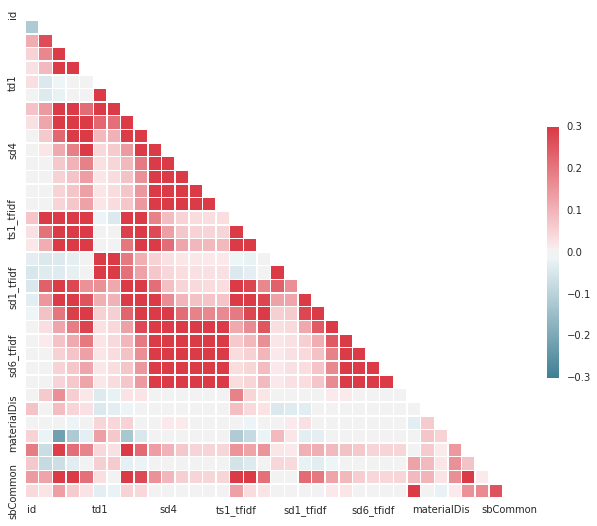

In [59]:
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [33]:
from sklearn import linear_model

## Ridge 

In [34]:
ridge = linear_model.Ridge()

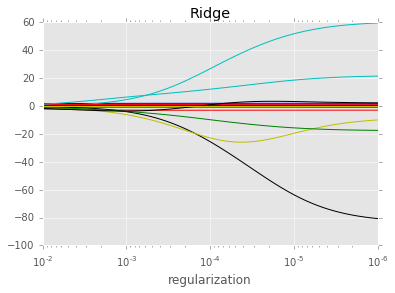

In [35]:
n_alphas = 100
alphas = np.logspace(-6, -2, n_alphas)
NUM_COLORS = 29

coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_all, Y)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

plt.legend()
plt.title('Ridge')
plt.xlabel('regularization')
plt.show()

In [36]:
from sklearn.cross_validation import KFold
import math

In [37]:
#find the best penalty
b=[]
for alpha1 in alphas:
    ridge = linear_model.Ridge(alpha=alpha1)
    kf_total = KFold(len(df.id), n_folds=5, shuffle=True, random_state=4)
    a=[]
    for train, test in kf_total:
        x_train = df.iloc[train,2:36]
        y_train = df.iloc[train,1]
        x_test = df.iloc[test,2:36]
        y_test = df.iloc[test,1]
        ridge.fit(x_train,y_train)
        a.append(math.sqrt(np.mean((ridge.predict(x_test) - y_test) ** 2)))
    b.append(np.mean(a))

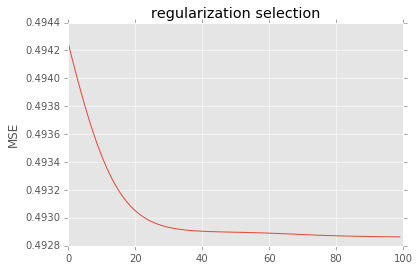

In [38]:
plt.plot(b)
plt.title('regularization selection')
plt.ylabel('MSE')

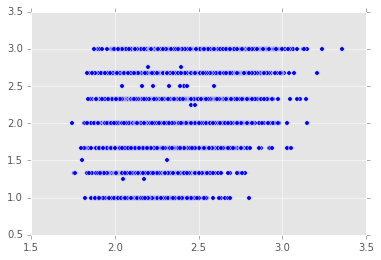

In [39]:
#predict vs true value in cv
plt.scatter(ridge.predict(x_test),y_test)
plt.show()

In [40]:
#the mse of all features
ridge = linear_model.Ridge(alpha=alphas[30])
kf_total = KFold(len(df.id), n_folds=5, shuffle=True, random_state=4)
a=[]
for train, test in kf_total:
    x_train = df.iloc[train,2:36]
    y_train = df.iloc[train,1]
    x_test = df.iloc[test,2:36]
    y_test = df.iloc[test,1]
    ridge.fit(x_train,y_train)
    a.append(math.sqrt(np.mean((ridge.predict(x_test) - y_test) ** 2)))
print(np.mean(a))

0.492932188209


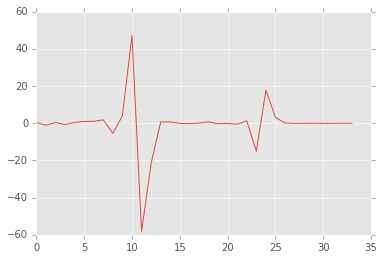

In [41]:
plt.plot(ridge.coef_)
plt.show()

In [42]:
df.columns[[10,11,23,24]]

Index([u'sd4', u'sd5', u'sd4_tfidf', u'sd5_tfidf'], dtype='object')

In [43]:
#the mse of distance
ridge = linear_model.Ridge(alpha=alphas[30])
kf_total = KFold(len(df.id), n_folds=5, shuffle=True, random_state=4)
a=[]
for train, test in kf_total:
    x_train = df.iloc[train,2:15]
    y_train = df.iloc[train,1]
    x_test = df.iloc[test,2:15]
    y_test = df.iloc[test,1]
    ridge.fit(x_train,y_train)
    a.append(math.sqrt(np.mean((ridge.predict(x_test) - y_test) ** 2)))
print(np.mean(a))

0.513274477991


In [44]:
#the mse of tfidf
ridge = linear_model.Ridge(alpha=alphas[30])
kf_total = KFold(len(df.id), n_folds=5, shuffle=True, random_state=4)
a=[]
for train, test in kf_total:
    x_train = df.iloc[train,15:28]
    y_train = df.iloc[train,1]
    x_test = df.iloc[test,15:28]
    y_test = df.iloc[test,1]
    ridge.fit(x_train,y_train)
    a.append(math.sqrt(np.mean((ridge.predict(x_test) - y_test) ** 2)))
print(np.mean(a))

0.500662678569


In [45]:
#the mse of customized
ridge = linear_model.Ridge(alpha=alphas[30])
kf_total = KFold(len(df.id), n_folds=5, shuffle=True, random_state=4)
a=[]
for train, test in kf_total:
    x_train = df.iloc[train,28:31]
    y_train = df.iloc[train,1]
    x_test = df.iloc[test,28:31]
    y_test = df.iloc[test,1]
    ridge.fit(x_train,y_train)
    a.append(math.sqrt(np.mean((ridge.predict(x_test) - y_test) ** 2)))
print(np.mean(a))

0.532929442791


In [46]:
#the mse of count
ridge = linear_model.Ridge(alpha=alphas[30])
kf_total = KFold(len(df.id), n_folds=5, shuffle=True, random_state=4)
a=[]
for train, test in kf_total:
    x_train = df.iloc[train,31:36]
    y_train = df.iloc[train,1]
    x_test = df.iloc[test,31:36]
    y_test = df.iloc[test,1]
    ridge.fit(x_train,y_train)
    a.append(math.sqrt(np.mean((ridge.predict(x_test) - y_test) ** 2)))
print(np.mean(a))

0.521126868699


In [47]:
alphas[30]

1.6297508346206434e-05

## Linear Regression

In [48]:
lr = linear_model.LinearRegression()

In [92]:
lr.fit(X_back,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
#the mse of the all-features
kf_total = KFold(len(df.id), n_folds=5, shuffle=True, random_state=4)
a=[]
for train, test in kf_total:
    x_train = df.iloc[train,[2,15,16,18,20,31,32,33]]
    y_train = df.iloc[train,1]
    x_test = df.iloc[test,[2,15,16,18,20,31,32,33]]
    y_test = df.iloc[test,1]
    ridge.fit(x_train,y_train)
    a.append(math.sqrt(np.mean((ridge.predict(x_test) - y_test) ** 2)))
print(np.mean(a))

0.494419120359


In [125]:
#the mse of the distance
kf_total = KFold(len(df.id), n_folds=5, shuffle=True, random_state=4)
a=[]
for train, test in kf_total:
    x_train = df.iloc[train,[2,3,4,5,7,8,9,10]]
    y_train = df.iloc[train,1]
    x_test = df.iloc[test,[2,3,4,5,7,8,9,10]]
    y_test = df.iloc[test,1]
    ridge.fit(x_train,y_train)
    a.append(math.sqrt(np.mean((ridge.predict(x_test) - y_test) ** 2)))
print(np.mean(a))

0.513264909129


In [138]:
#the mse of the count
kf_total = KFold(len(df.id), n_folds=5, shuffle=True, random_state=4)
a=[]
for train, test in kf_total:
    x_train = df.iloc[train,31:35]
    y_train = df.iloc[train,1]
    x_test = df.iloc[test,31:35]
    y_test = df.iloc[test,1]
    ridge.fit(x_train,y_train)
    a.append(math.sqrt(np.mean((ridge.predict(x_test) - y_test) ** 2)))
print(np.mean(a))

0.521111759398


In [139]:
#the mse of the tfidf
kf_total = KFold(len(df.id), n_folds=5, shuffle=True, random_state=4)
a=[]
for train, test in kf_total:
    x_train = df.iloc[train,[15,16,17,18,19,20,21,23]]
    y_train = df.iloc[train,1]
    x_test = df.iloc[test,[15,16,17,18,19,20,21,23]]
    y_test = df.iloc[test,1]
    ridge.fit(x_train,y_train)
    a.append(math.sqrt(np.mean((ridge.predict(x_test) - y_test) ** 2)))
print(np.mean(a))

0.500568140957


In [150]:
#the mse of the customize
kf_total = KFold(len(df.id), n_folds=5, shuffle=True, random_state=4)
a=[]
for train, test in kf_total:
    x_train = df.iloc[train,28:29]
    y_train = df.iloc[train,1]
    x_test = df.iloc[test,28:29]
    y_test = df.iloc[test,1]
    ridge.fit(x_train,y_train)
    a.append(math.sqrt(np.mean((ridge.predict(x_test) - y_test) ** 2)))
print(np.mean(a))

0.532919060817
